In [15]:
# Dependencies and set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time 
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy
import datetime

# Generate the cities list by using the citipy library

In [4]:

# Creat empty list for holding the latitude and longitude combinations
lat_lngs = []
# creat empty list for holding the cities names
cities = []
# Range of latitude and longitudes 
lat_range = (-90,90)
lng_range = (-180,180)
# creat a set of random lat and lng combinations 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats,lngs)
# Identify the nearest city for each lat , lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # if city is unique then add it to cities list
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count 
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [28]:
#url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key 
#url

In [24]:
# set the API base UrL
city_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key
# Create list for weather data
city_data = []
# Create counters

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#loop through all the cities in cities[] to fitch weather data
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # creat endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    # log URL ,Record , and set number
    print("Processing Record %s of set %s | %s" % (record_count, set_count ,city))
    # add 1 to the record count 
    record_count += 1
    # Run an API request for each city 
    try:
        city_weather = requests.get(city_url).json()
        
           
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = datetime.datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # append the city info into city_data list
        city_data.append({"City" : city, "Lat" : city_lat, "Lng" : city_lng,
                             "Max Temp" : city_max_temp, "Humidity": city_humidity,
                             "Cloudiness" : city_clouds, "Wind Speed" : city_wind,
                             "Country" : city_country, "Date" : city_date})
    except:
        print("City not found.   SKIPPING....")
       
    
            
# indicate that data loading is complete
print("---------------------------------------")
print("Data Retrieval Complete                ")
print("---------------------------------------")
            
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | mataura
Processing Record 3 of set 1 | nikolskoye
Processing Record 4 of set 1 | castro
Processing Record 5 of set 1 | upernavik
Processing Record 6 of set 1 | nizhneyansk
City not found.   SKIPPING....
Processing Record 7 of set 1 | harbour breton
Processing Record 8 of set 1 | fontainebleau
Processing Record 9 of set 1 | satitoa
City not found.   SKIPPING....
Processing Record 10 of set 1 | san angelo
Processing Record 11 of set 1 | grand river south east
City not found.   SKIPPING....
Processing Record 12 of set 1 | port-gentil
Processing Record 13 of set 1 | uglovskoye
Processing Record 14 of set 1 | kapaa
Processing Record 15 of set 1 | port blair
Processing Record 16 of set 1 | butaritari
Processing Record 17 of set 1 | moyale
Processing Record 18 of set 1 | attawapiskat
City not found.   SKIPPING....
Processing Record 19 of set 1 | calmar
Processing R

Processing Record 36 of set 4 | kununurra
Processing Record 37 of set 4 | ishigaki
Processing Record 38 of set 4 | severo-kurilsk
Processing Record 39 of set 4 | hasaki
Processing Record 40 of set 4 | flinders
Processing Record 41 of set 4 | atar
Processing Record 42 of set 4 | alakurtti
Processing Record 43 of set 4 | grand gaube
Processing Record 44 of set 4 | ostrovnoy
Processing Record 45 of set 4 | gushikawa
Processing Record 46 of set 4 | broome
Processing Record 47 of set 4 | tumannyy
City not found.   SKIPPING....
Processing Record 48 of set 4 | lompoc
Processing Record 49 of set 4 | sola
Processing Record 0 of set 5 | raudeberg
Processing Record 1 of set 5 | chuy
Processing Record 2 of set 5 | sundsvall
Processing Record 3 of set 5 | walvis bay
Processing Record 4 of set 5 | karaul
City not found.   SKIPPING....
Processing Record 5 of set 5 | praya
Processing Record 6 of set 5 | samusu
City not found.   SKIPPING....
Processing Record 7 of set 5 | kodinsk
Processing Record 8 of

Processing Record 24 of set 8 | kerki
City not found.   SKIPPING....
Processing Record 25 of set 8 | meyungs
City not found.   SKIPPING....
Processing Record 26 of set 8 | inuvik
Processing Record 27 of set 8 | tsihombe
City not found.   SKIPPING....
Processing Record 28 of set 8 | tshikapa
Processing Record 29 of set 8 | bardiyah
Processing Record 30 of set 8 | kulhudhuffushi
Processing Record 31 of set 8 | zhanatas
City not found.   SKIPPING....
Processing Record 32 of set 8 | apatou
Processing Record 33 of set 8 | daru
Processing Record 34 of set 8 | luena
Processing Record 35 of set 8 | mazamari
Processing Record 36 of set 8 | tembisa
Processing Record 37 of set 8 | viedma
Processing Record 38 of set 8 | meulaboh
Processing Record 39 of set 8 | vanimo
Processing Record 40 of set 8 | college
Processing Record 41 of set 8 | kushmurun
Processing Record 42 of set 8 | carlisle
Processing Record 43 of set 8 | sur
Processing Record 44 of set 8 | toumodi
Processing Record 45 of set 8 | ail

Processing Record 12 of set 12 | tokur
Processing Record 13 of set 12 | hanchuan
Processing Record 14 of set 12 | kangaatsiaq
Processing Record 15 of set 12 | valparaiso
Processing Record 16 of set 12 | san ramon de la nueva oran
Processing Record 17 of set 12 | nakhon phanom
Processing Record 18 of set 12 | rogers
Processing Record 19 of set 12 | bethanien
Processing Record 20 of set 12 | punta cardon
Processing Record 21 of set 12 | mackay
Processing Record 22 of set 12 | labuan
Processing Record 23 of set 12 | chimoio
Processing Record 24 of set 12 | kegayli
City not found.   SKIPPING....
Processing Record 25 of set 12 | pasighat
Processing Record 26 of set 12 | belmonte
Processing Record 27 of set 12 | monrovia
---------------------------------------
Data Retrieval Complete                
---------------------------------------


In [25]:
len(city_data)


531

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.18,74,0,6.92,PF,2023-01-24 05:45:04
1,mataura,-46.1927,168.8643,17.75,48,10,2.76,NZ,2023-01-24 05:51:29
2,nikolskoye,59.7035,30.7861,-3.06,89,100,4.55,RU,2023-01-24 05:51:29
3,castro,-24.7911,-50.0119,16.04,95,70,1.11,BR,2023-01-24 05:51:29
4,upernavik,72.7868,-56.1549,-22.12,95,100,3.76,GL,2023-01-24 05:51:30


In [27]:
city_data_df.count()

City          531
Lat           531
Lng           531
Max Temp      531
Humidity      531
Cloudiness    531
Wind Speed    531
Country       531
Date          531
dtype: int64

In [42]:
city_data_df.to_csv("../weather_data/cities.csv", index_label="City_ID")

# Creat the Scatter Plots


# Latitude Vs. Temperature

In [35]:
# Pull revelant Data from DF
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

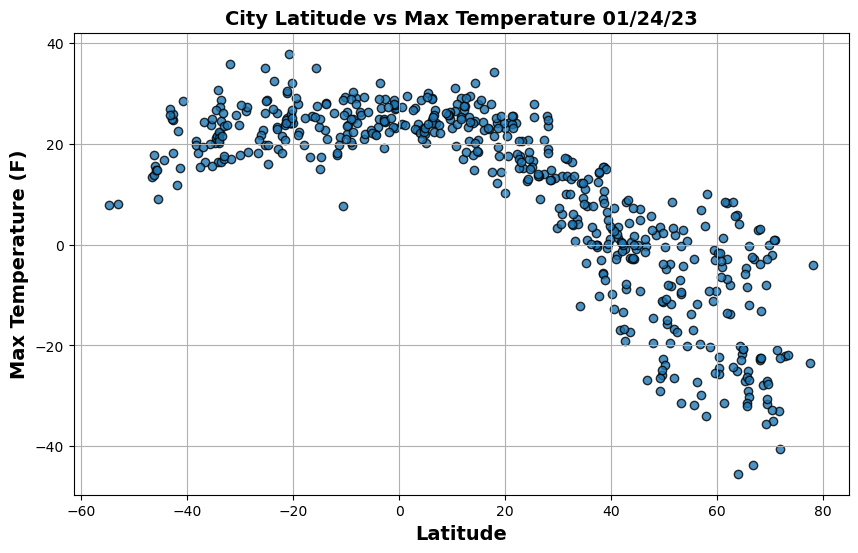

In [43]:
 #Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('../weather_data/Fig1.png')
plt.show

# Latitude Vs. Humidity 

<function matplotlib.pyplot.show(close=None, block=None)>

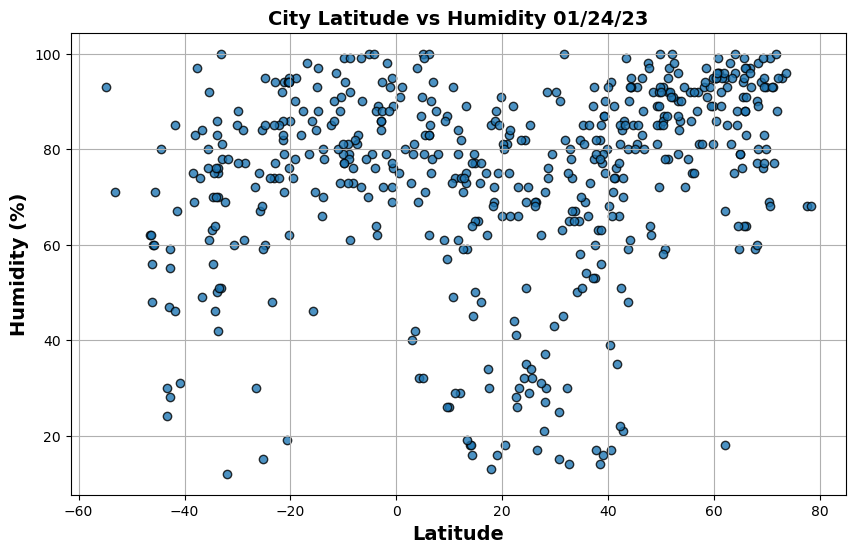

In [45]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('../weather_data/Fig2.png')
plt.show

# Latitude vs Cloudiness

<function matplotlib.pyplot.show(close=None, block=None)>

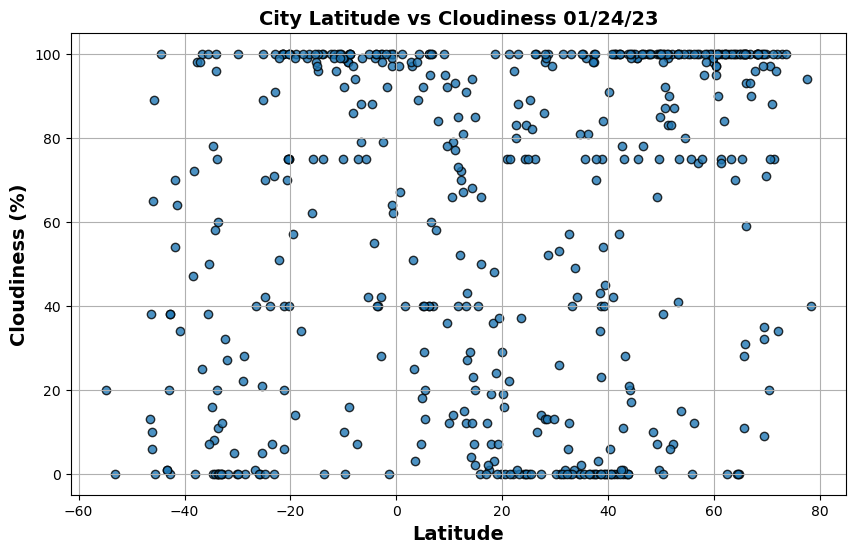

In [47]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('../weather_data/Fig3.png')
plt.show

# Latitude vs Wind Speed

<function matplotlib.pyplot.show(close=None, block=None)>

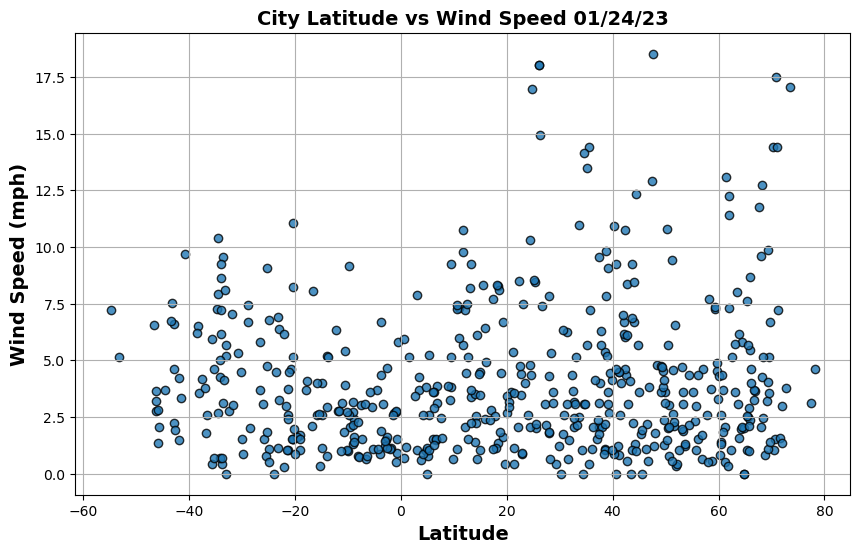

In [49]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('../weather_data/Fig4.png')
plt.show

# Linear Regression  by Hemisphere


#  Create a linear regression function

In [63]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()

In [64]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear Regression : Latitude vs Max Temperature 

      Slope  Intercept   r Value        p Value  Std Error
0 -0.754192  32.455895 -0.850698  2.661859e-102   0.024596


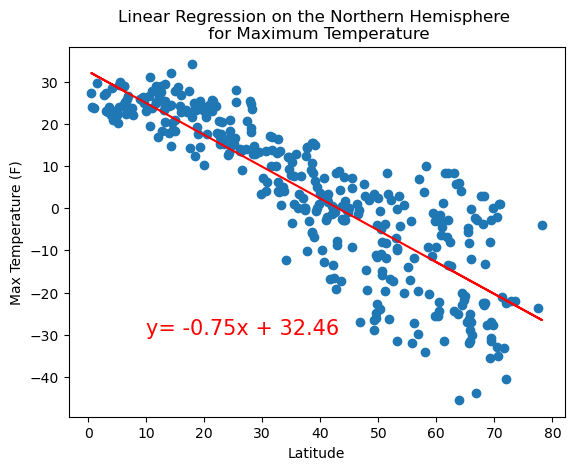

<Figure size 640x480 with 0 Axes>

In [79]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (10,-30))
plt.savefig('../weather_data/Fig5.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.153049  26.507733  0.404947  4.316771e-08   0.026662


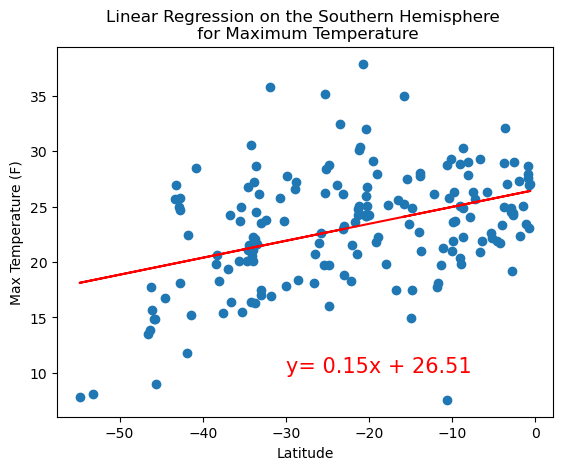

<Figure size 640x480 with 0 Axes>

In [82]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,10))
plt.savefig('../weather_data/Fig6.png')

# Linear Regression : Latitude vs Humidity by Hemisphere

      Slope  Intercept  r Value       p Value  Std Error
0  0.402204   58.20153    0.374  1.985254e-13   0.052639


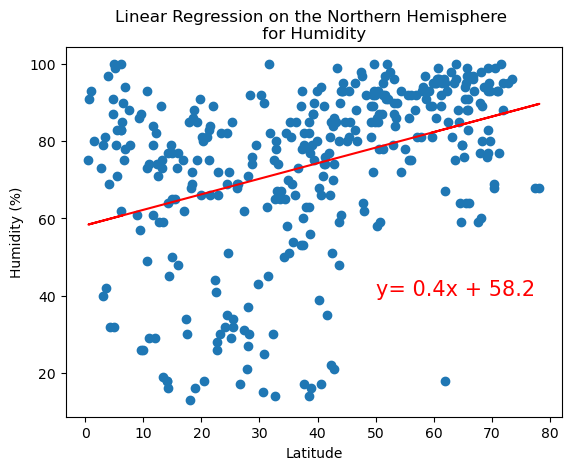

<Figure size 640x480 with 0 Axes>

In [96]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (50,40))
plt.savefig('../weather_data/Fig7.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.556394  87.277037  0.435584  2.910894e-09    0.08871


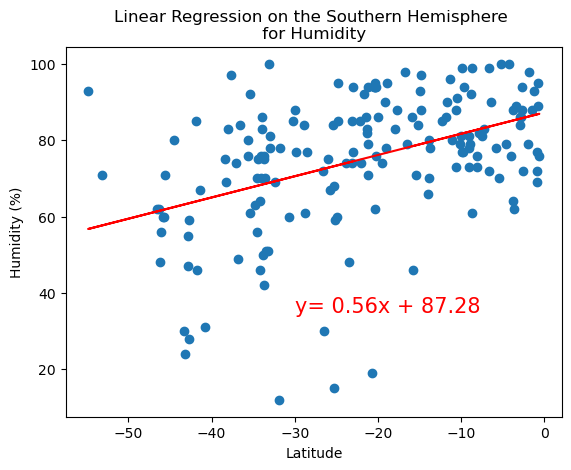

<Figure size 640x480 with 0 Axes>

In [97]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,35))
plt.savefig('../weather_data/Fig8.png')

# Linear Regression for Latitude vs Cloudiness by Hemisphere

      Slope  Intercept   r Value       p Value  Std Error
0  0.593164   36.98354  0.302456  4.500864e-09   0.098658


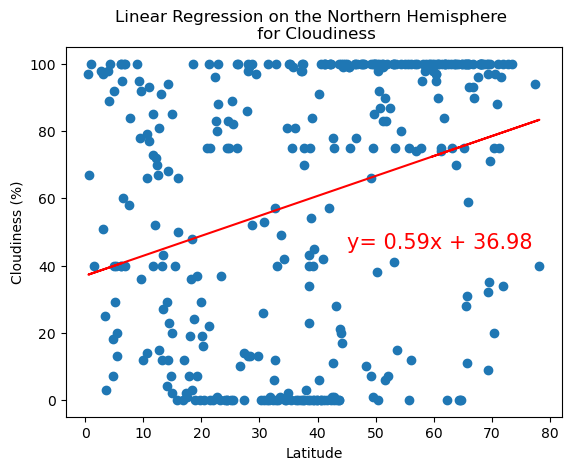

<Figure size 640x480 with 0 Axes>

In [100]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (45,45))
plt.savefig('../weather_data/Fig9.png')

      Slope  Intercept   r Value       p Value  Std Error
0  1.400667   89.31089  0.486386  1.763286e-11   0.194126


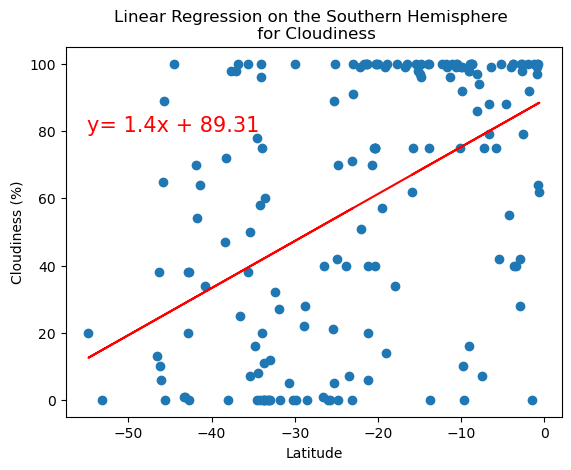

<Figure size 640x480 with 0 Axes>

In [102]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,80))
plt.savefig('../weather_data/Fig10.png')

# Linear Regression for Latitude vs Wind Speed by Hemisphere

      Slope  Intercept   r Value   p Value  Std Error
0  0.009657   3.856567  0.055622  0.291899   0.009149


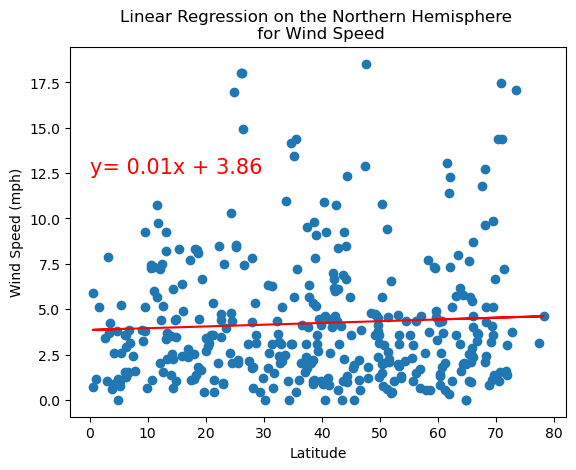

<Figure size 640x480 with 0 Axes>

In [105]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (0,12.5))
plt.savefig('../weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.060043   2.143449 -0.334474  0.000008   0.013052


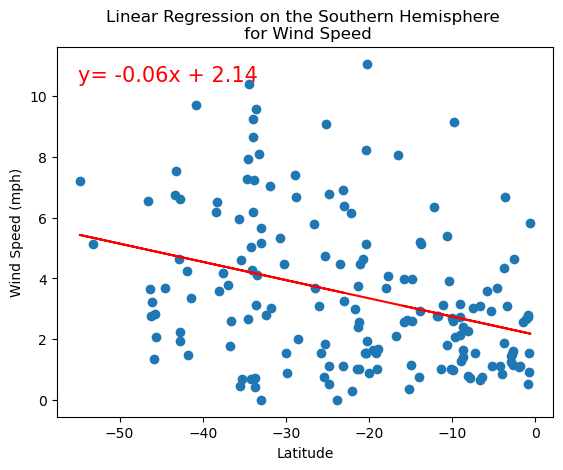

<Figure size 640x480 with 0 Axes>

In [110]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-55,10.5))
plt.savefig('../weather_data/Fig12.png')